<a href="https://colab.research.google.com/github/KiranJ9/Image-Classification/blob/main/Image_Classification(Proj).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ImageData
!pip install bing_image_downloader

In [ ]:
#Check execution time
!pip install ipython-autotime
%load_ext autotime

In [ ]:
from bing_image_downloader import downloader
downloader.download("burgers",limit = 40,output_dir = 'ImageData')

In [ ]:
downloader.download("pizza",limit = 40,output_dir = 'ImageData')

In [ ]:
downloader.download("tasty pastas",limit = 40,output_dir = 'ImageData')

In [ ]:
#Preprocessing the ImageData
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread #To read the image
from skimage.transform import resize #Resizing the image

output = []
images = []
flat_data = []

DATADIR = '/content/ImageData'
CATEGORIES = ['burgers','pizza','tasty pastas']
for category in CATEGORIES:
  num_class = CATEGORIES.index(category)
  print(num_class)
  path = os.path.join(DATADIR,category)
  print(path)
  for img in os.listdir(path):
    img_read = imread(os.path.join(path,img))
    print(img_read)
    resized_img = resize(img_read,(100,100,3))
    flat_data.append(resized_img.flatten())
    images.append(resized_img)
    output.append(num_class)
flat_data = np.array(flat_data)
output = np.array(output)
images = np.array(images)

In [221]:
flat_data.ndim

2

time: 3.36 ms (started: 2021-04-16 14:09:27 +00:00)


In [222]:
print(flat_data)

[[0.2190098  0.19803922 0.12745098 ... 0.08627451 0.08627451 0.07843137]
 [0.0712549  0.06341176 0.1172549  ... 0.16615686 0.20392157 0.39019608]
 [0.38994118 0.62327451 0.71878431 ... 0.42448039 0.38918627 0.22953922]
 ...
 [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 0.99607843]
 [0.96078431 0.91078431 0.76862745 ... 0.87647059 0.88039216 0.88823529]
 [0.00392157 0.01960784 0.01960784 ... 0.49215686 0.48039216 0.5254902 ]]
time: 3.77 ms (started: 2021-04-16 14:10:45 +00:00)


In [232]:
print(output)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
time: 3.52 ms (started: 2021-04-16 14:55:06 +00:00)


<BarContainer object of 3 artists>

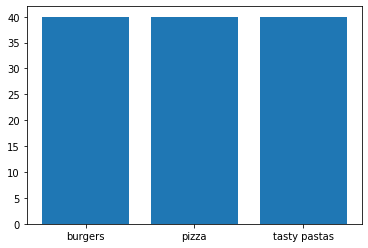

time: 147 ms (started: 2021-04-16 14:10:54 +00:00)


In [224]:
unique, count = np.unique(output,return_counts=True)
plt.bar(CATEGORIES,count)

In [225]:
x=flat_data
y=output

time: 1.25 ms (started: 2021-04-16 14:10:59 +00:00)


In [226]:
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

time: 6.51 ms (started: 2021-04-16 14:11:01 +00:00)


In [279]:
!pip install xgboost

time: 2.54 s (started: 2021-04-16 16:10:52 +00:00)


In [569]:
#Splitting the data for Training and Testing
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=400)
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

time: 43.6 s (started: 2021-04-16 17:30:58 +00:00)


In [570]:
y_pred = model.predict(x_test)
y_pred

array([0, 2, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2,
       1, 2])

time: 31.8 ms (started: 2021-04-16 17:32:20 +00:00)


In [571]:
y_test

array([0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2,
       1, 2])

time: 3.82 ms (started: 2021-04-16 17:32:22 +00:00)


In [572]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.28 ms (started: 2021-04-16 17:32:23 +00:00)


In [573]:
accuracy_score(y_pred,y_test)

0.75

time: 7.97 ms (started: 2021-04-16 17:32:25 +00:00)


In [576]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.00%
time: 4.43 ms (started: 2021-04-16 17:32:44 +00:00)


In [575]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

time: 29.6 ms (started: 2021-04-16 17:32:42 +00:00)


In [577]:
confusion_matrix(y_pred,y_test)

array([[ 3,  3,  0],
       [ 2,  3,  0],
       [ 0,  1, 12]])

time: 5.4 ms (started: 2021-04-16 17:33:43 +00:00)


In [579]:
#Saving model using Pickle library
import pickle
pickle.dump(model,open('img_model.p','wb'))

time: 12.5 ms (started: 2021-04-16 17:36:00 +00:00)


In [581]:
model = pickle.load(open('img_model.p','rb'))

time: 7.22 ms (started: 2021-04-16 17:37:21 +00:00)


Enter the image URLhttps://api.pizzahut.io/v1/content/en-in/in-1/images/pizza/tandoori-paneer.f2b53eed52aaeedf5f698407729c9baa.1.jpg
(528, 768, 3)
Prediction:tasty pastas


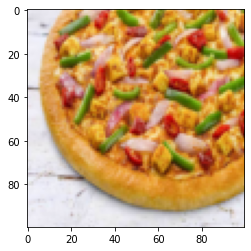

time: 4.29 s (started: 2021-04-16 17:52:04 +00:00)


In [591]:
#Testing 
flat_data = []
url = input('Enter the image URL')
img = imread(url)
resized_img = resize(img,(100,100,3))
flat_data.append(resized_img.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(resized_img)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Prediction:{y_out}')